In [1]:
import pandas as pd

# Load dataset dari file Excel
file_path = 'produksiPadi.xlsx'
data = pd.read_excel(file_path)

# Tampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
print(data.head())


   Tahun  Produksi Padi(Ton)
0   1970          18693649.0
1   1971          20483687.0
2   1972          19393933.0
3   1973          21490578.0
4   1974          22476073.0


In [2]:
# Melihat informasi tentang dataset
print(data.info())

# Statistik deskriptif untuk memahami distribusi data
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 980.0 bytes
None
             Tahun  Produksi Padi(Ton)
count    53.000000        5.300000e+01
mean   1996.000000        4.694139e+07
std      15.443445        1.632983e+07
min    1970.000000        1.869365e+07
25%    1983.000000        3.530311e+07
50%    1996.000000        4.937705e+07
75%    2009.000000        5.460403e+07
max    2022.000000        8.114862e+07


In [5]:
# Menambahkan fitur lagging berdasarkan 'Produksi Padi(Ton)'
data['Produksi_Lag1'] = data['Produksi Padi(Ton)'].shift(1)
data['Produksi_Lag2'] = data['Produksi Padi(Ton)'].shift(2)

# Menghapus baris dengan nilai NaN akibat lagging
data = data.dropna()

print(data.head())


   Tahun  Produksi Padi(Ton)  Produksi_Lag1  Produksi_Lag2
2   1972          19393933.0     20483687.0     18693649.0
3   1973          21490578.0     19393933.0     20483687.0
4   1974          22476073.0     21490578.0     19393933.0
5   1975          22339455.0     22476073.0     21490578.0
6   1976          23300939.0     22339455.0     22476073.0


In [6]:
# Fitur adalah data lagging
X = data[['Produksi_Lag1', 'Produksi_Lag2']]
y = data['Produksi Padi(Ton)']

# Split data menjadi training dan testing (70:30)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)


Data latih: (35, 2)
Data uji: (16, 2)


In [7]:
from sklearn.linear_model import LinearRegression

# Inisialisasi dan pelatihan model
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept model
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)


Koefisien: [ 1.1617607  -0.15076943]
Intercept: 279647.160991922


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 37419072103668.56
Root Mean Squared Error (RMSE): 6117113.0530396905
Mean Absolute Percentage Error (MAPE): 0.05672749672732637


In [9]:
# Data untuk prediksi 2023
produksi_2021 = 1000  # Ganti dengan nilai sebenarnya
produksi_2022 = 1050  # Ganti dengan nilai sebenarnya

# Membuat array input untuk 2023 dan 2024
input_2023 = [[produksi_2022, produksi_2021]]
prediksi_2023 = model.predict(input_2023)[0]

# Data untuk prediksi 2024
input_2024 = [[prediksi_2023, produksi_2022]]
prediksi_2024 = model.predict(input_2024)[0]

print("Prediksi Produksi Padi Tahun 2023:", prediksi_2023)
print("Prediksi Produksi Padi Tahun 2024:", prediksi_2024)


Prediksi Produksi Padi Tahun 2023: 280716.24030056107
Prediksi Produksi Padi Tahun 2024: 605613.9501566613


c:\Program Files\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Program Files\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


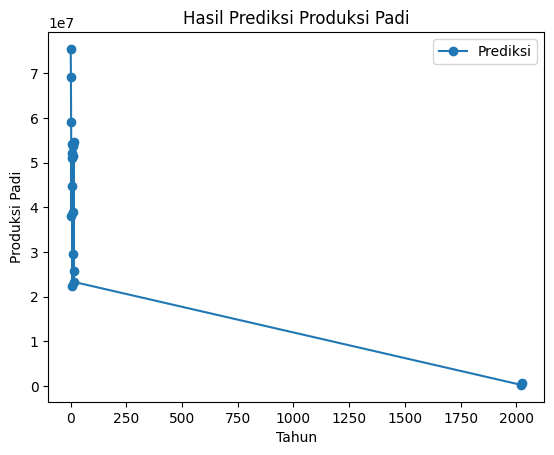

In [10]:
import matplotlib.pyplot as plt

# Data aktual dan prediksi
years = list(range(len(y_test))) + [2023, 2024]
values = list(y_test) + [prediksi_2023, prediksi_2024]

plt.plot(years, values, marker='o', label="Prediksi")
plt.xlabel("Tahun")
plt.ylabel("Produksi Padi")
plt.title("Hasil Prediksi Produksi Padi")
plt.legend()
plt.show()


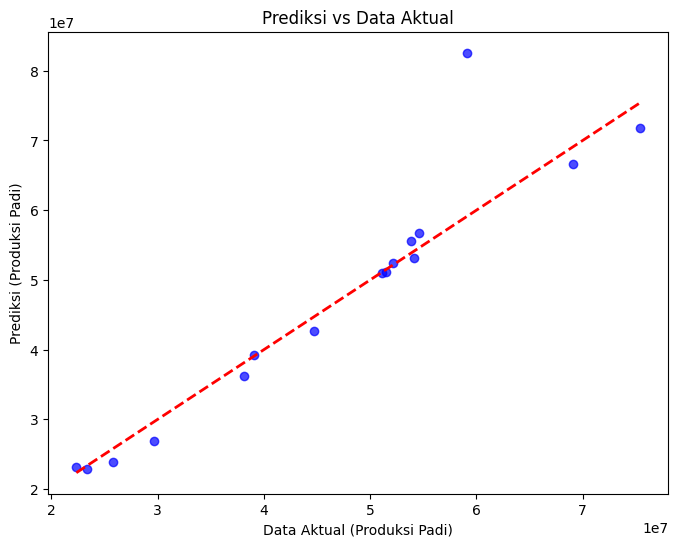

In [11]:
import matplotlib.pyplot as plt

# Scatter plot untuk membandingkan data aktual dan prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Garis ideal
plt.xlabel("Data Aktual (Produksi Padi)")
plt.ylabel("Prediksi (Produksi Padi)")
plt.title("Prediksi vs Data Aktual")
plt.show()


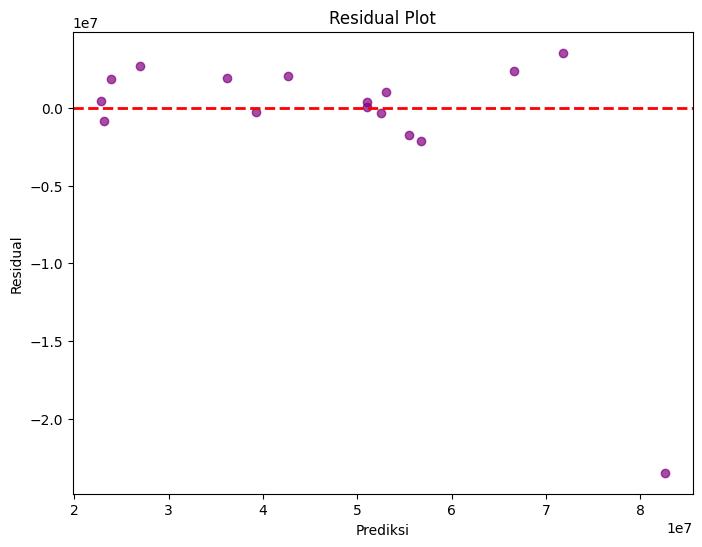

In [12]:
# Menghitung residual
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)  # Garis nol untuk referensi
plt.xlabel("Prediksi")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()


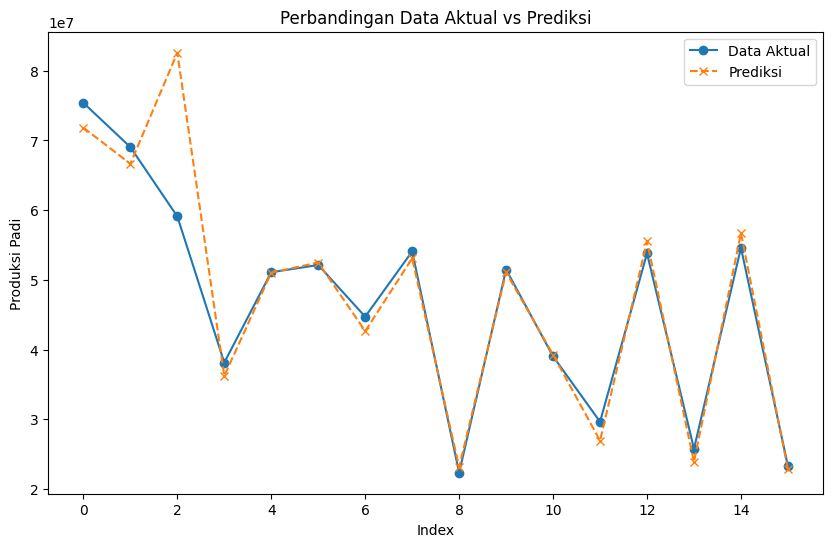

In [13]:
# Membuat line plot untuk perbandingan
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Data Aktual', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Prediksi', marker='x', linestyle='--')
plt.xlabel("Index")
plt.ylabel("Produksi Padi")
plt.title("Perbandingan Data Aktual vs Prediksi")
plt.legend()
plt.show()


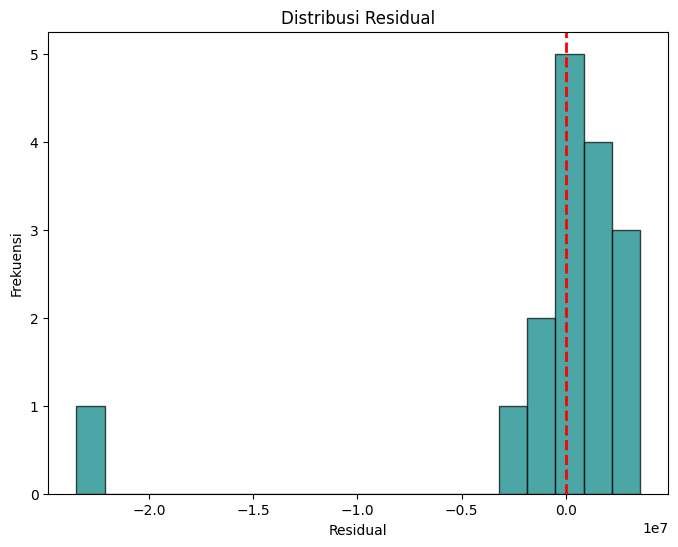

In [14]:
# Histogram residual
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='teal', edgecolor='black', alpha=0.7)
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.title("Distribusi Residual")
plt.show()
